In [1]:
from qiskit import providers,execute,QuantumRegister,ClassicalRegister,QuantumCircuit,transpile,Aer,assemble,IBMQ
from qiskit.tools import job_monitor
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from numpy.random import randint,random_integers
import numpy as np
import math

In [2]:
def encode_message(bits,bases):
    message=[]
    for i in range(n):
        qc=QuantumCircuit(1,1)
        if(bases[i]==1):#z basis
            if(bits[i]==0):
                pass
            else:
                qc.x(0)
        else:#x basis
            if(bits[i]==0):
                qc.h(0)#creating |+> state 
            else:
                qc.x(0)#converting to 1 
                qc.h(0)#creating |-> state
        message.append(qc)
    return message
  
def measure_message(message,bases): 
    measured=[]
    for j in range(n):
        if(bases[j]==1):# z bases
            message[j].measure(0,0)
        else:# x bases
            message[j].h(0)
            message[j].measure(0,0)
        simul=Aer.get_backend('aer_simulator')
        qobj=assemble(message[j],shots=1024,memory=True)
        result=simul.run(qobj).result()
        measurement=int(result.get_memory()[0])
        measured.append(measurement)
    return measured

def key_selection(s_bases,r_bases,bits):
    good_bits=[]  
    for i in range(n):
        if(s_bases[i]==r_bases[i]):
            good_bits.append(bits[i])
    return good_bits

def sampling(bits,string):
    sample=[]
    for i in string:
        i=np.mod(i,len(bits))#ensuring that the sample string doesnot exceed the key
        sample.append(bits.pop(i))
    return sample


In [3]:
'''
Ideal Condition without eve in noisless enviornment with four Qubits
'''
n=4
sender_bits=np.random.randint(2,size=n)
print("Sender chososes to sent the following string of bits")
print(sender_bits)



qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#Generation of Bits
for i in range(n):
    if(sender_bits[i]==1):
        circuit.x(qreg_q[i])
circuit.draw()

sender_basis=randint(2,size=n)
print("Sender choose the followwing basis where 1 denotes Z basis and 0 denotes X basis")
print(sender_basis)

#Generation of Basis
for i in range(n):
    if(sender_basis[i]==0):
        circuit.h(qreg_q[i])
circuit.draw()

reciever_basis=randint(2,size=n)
print("Reciever choose folowing basis where 1 denotes Z basis and 0 denotes X basis")
print(reciever_basis)

#Reciever Basis and Meaurement
for i in range(n):
    if(reciever_basis[i]==0):
        circuit.h(qreg_q[i])
        circuit.measure(qreg_q[i], creg_c[i])
    else:
        circuit.measure(qreg_q[i], creg_c[i])
circuit.draw()

data=encode_message(sender_bits,sender_basis)
key=measure_message(data,reciever_basis)
s_key=key_selection(sender_basis,reciever_basis,sender_bits)
r_key=key_selection(sender_basis,reciever_basis,key)
print("These are the common key shared")
print(s_key)
print(r_key)

s=math.ceil(len(s_key) * 0.25)
print(" sample .... ", s)
sample_size=randint(0,s)

print("length of sifted key is ",len(s_key) )
print("length of sample taken is ",sample_size)


sample_string = randint(n, size=sample_size)
sender_sample=sampling(s_key,sample_string)
reciever_sample=sampling(r_key,sample_string)

mismatch = 0
for i in range(sample_size):
    if(sender_sample[i]!=reciever_sample[i]):
        mismatch = mismatch+1
        
        
print("Sender_Sample")
print(sender_sample)
print("Receiver_Sample")
print(reciever_sample)
if (sender_sample==reciever_sample):
    print("Cryptographic_key_is")
    print(r_key)
else:
    print("Eve's Dropping")
    error_rate=mismatch/sample_size
    print("Error_rate=",error_rate)
            
    

Sender chososes to sent the following string of bits
[0 0 1 0]
Sender choose the followwing basis where 1 denotes Z basis and 0 denotes X basis
[1 0 0 1]
Reciever choose folowing basis where 1 denotes Z basis and 0 denotes X basis
[0 1 1 0]
These are the common key shared
[]
[]
 sample ....  0
Traceback (most recent call last):
  Cell In[3], line 54
    sample_size=randint(0,s)
  File mtrand.pyx:748 in numpy.random.mtrand.RandomState.randint
  File _bounded_integers.pyx:1247 in numpy.random._bounded_integers._rand_int64
ValueError: high <= 0

Use %tb to get the full traceback.


/tmp/ipykernel_101/1967346627.py:29: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result=simul.run(qobj).result()


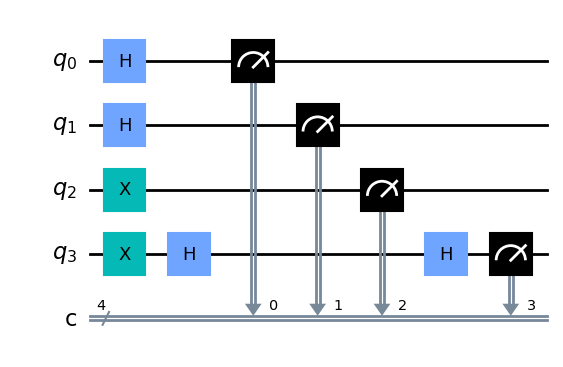

In [4]:
circuit.draw()

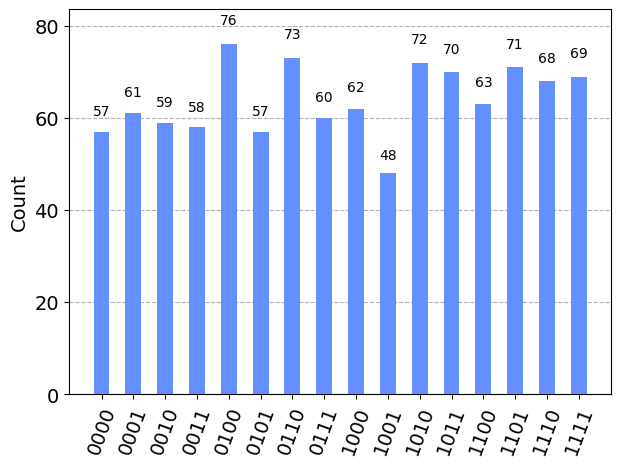

In [4]:
#Simulation of 5 qubit BB84 in ideal noiseless enviornment
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit, simulator)
result = simulator.run(circ,shot=1).result()
counts = result.get_counts(circ)
plot_histogram(counts)


In [6]:
###Eve dropping Condition with eve in noisless enviornment
from qiskit.circuit import quantumcircuit
#np.random.seed(seed=0)
n=4
sender_bits=randint(2,size=n)
print("Sender chososes to sent the following string of bits")
print(sender_bits)

#Circuit to test BB84 on ibmq_bogota c

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit2 = QuantumCircuit(qreg_q, creg_c)

#Generation of Bits
for i in range(n):
    if(sender_bits[i]==1):
        circuit2.x(qreg_q[i])
circuit2.draw()

sender_basis=randint(2,size=n)
print("Sender choose the followwing basis where 1 denotes Z basis and 0 denotes X basis")
print(sender_basis)

#Generation of Basis
for i in range(n):
    if(sender_basis[i]==0):
        circuit2.h(qreg_q[i])
circuit2.draw()


advesary_basis=randint(2,size=n)
print("Now the attacker choose the foloowing basis where 1 denotes Z basis and 0 denotes X basis")
print(advesary_basis)

#Generation of Eve's Basis
for i in range(n):
    if(advesary_basis[i]==0):
        circuit2.h(qreg_q[i])
        circuit2.measure(qreg_q[i], creg_c[i])
    else:
        circuit2.measure(qreg_q[i], creg_c[i])
circuit2.draw()

reciever_basis=randint(2,size=n)
print("Reciever choose folowing basis where 1 denotes Z basis and 0 denotes X basis")
print(reciever_basis)

#Reciever Basis and Meaurement
for i in range(n):
    if(reciever_basis[i]==0):
        circuit2.h(qreg_q[i])
        circuit2.measure(qreg_q[i], creg_c[i])
    else:
        circuit2.measure(qreg_q[i], creg_c[i])
circuit2.draw()

data=encode_message(sender_bits,sender_basis)
intercepted_message = measure_message(data,advesary_basis)
key=measure_message(data,reciever_basis)
s_key=key_selection(sender_basis,reciever_basis,sender_bits)
r_key=key_selection(sender_basis,reciever_basis,key)
print("These are the common key shared")
print(s_key)
print(r_key)
s=math.ceil(len(s_key) * 0.25)
print(" sample .... ", s)
sample_size=randint(0,s)
print("length of sifted key is ",len(s_key) )
print("length of sample taken is ",sample_size)




sample_string = randint(n, size=sample_size)
sender_sample=sampling(s_key,sample_string)
reciever_sample=sampling(r_key,sample_string)
mismatch = 0
for i in range(sample_size):
    if(sender_sample[i]!=reciever_sample[i]):
        mismatch = mismatch+1
        
print("Sender_Sample")
print(sender_sample)
print("Receiver_Sample")
print(reciever_sample)
if sender_sample==reciever_sample:
    print("Cryptographic_key_is")
    print(s_key)
else:
    print("Eve's Dropping")
    error_rate=mismatch/sample_size
    print("Error_rate=",error_rate)
    

Sender chososes to sent the following string of bits
[1 1 1 0]
Sender choose the followwing basis where 1 denotes Z basis and 0 denotes X basis
[1 1 0 1]
Now the attacker choose the foloowing basis where 1 denotes Z basis and 0 denotes X basis
[0 0 1 1]
Reciever choose folowing basis where 1 denotes Z basis and 0 denotes X basis
[1 0 1 0]
These are the common key shared
[1]
[0]
 sample ....  1
length of sifted key is  1
length of sample taken is  0
Sender_Sample
[]
Receiver_Sample
[]
Cryptographic_key_is
[1]


/tmp/ipykernel_120/1967346627.py:29: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result=simul.run(qobj).result()


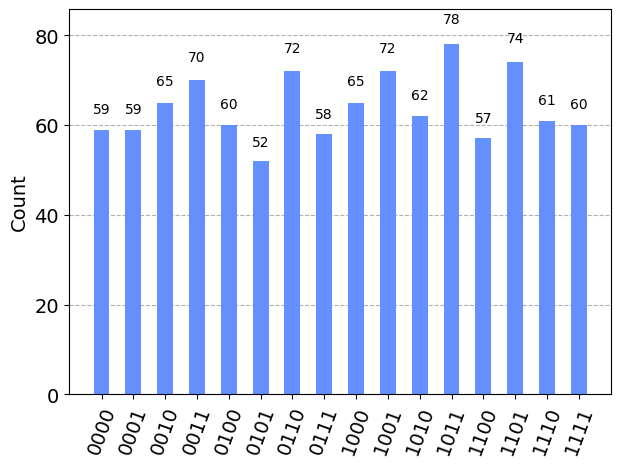

In [7]:
#Simulation of 5 qubit BB84 in ideal noiseless enviornment
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit2, simulator)
result = simulator.run(circ,shot=8192).result()
counts = result.get_counts(circ)
plot_histogram(counts)


In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
#circuit.measure(qreg_q[2], creg_c[2])

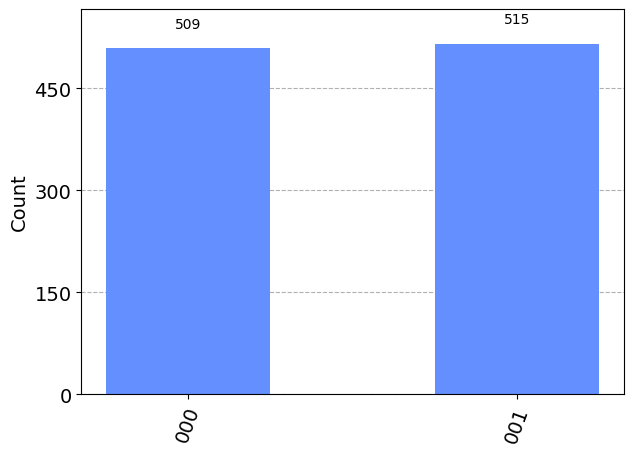

In [16]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit, simulator)
result = simulator.run(circ,shot=8192).result()
counts = result.get_counts(circ)
plot_histogram(counts)
